In [1]:
import helpers
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['text.usetex'] = True
sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)
df,df_coef=helpers.S13S14_loader()

# Figure S13

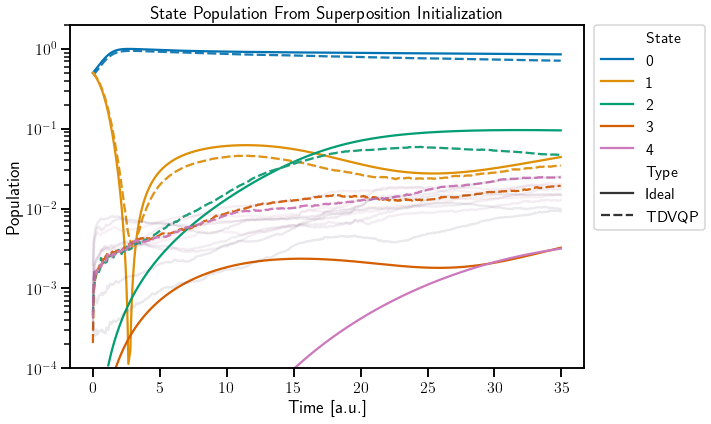

In [5]:
fig, ax = plt.subplots(figsize=((10, 6)))
sns.lineplot(data=df_coef.query('State<5 & Population>1e-4 &Type!="Exact" & Simulation == "Superposition"'),x='Time',y='Population',hue='State',style='Type',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=df_coef.query('State<15 & Population>1e-4 &Type=="TDVQP" & Simulation == "Superposition"'),x='Time',y='Population',hue='State',ci=None,ax=ax,legend=None,alpha=0.1)
plt.xlabel(r'Time [a.u.]')
plt.ylim([1e-4,2])
plt.yscale('log')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(r'State Population From Superposition Initialization')
plt.tight_layout()

# Figure S15

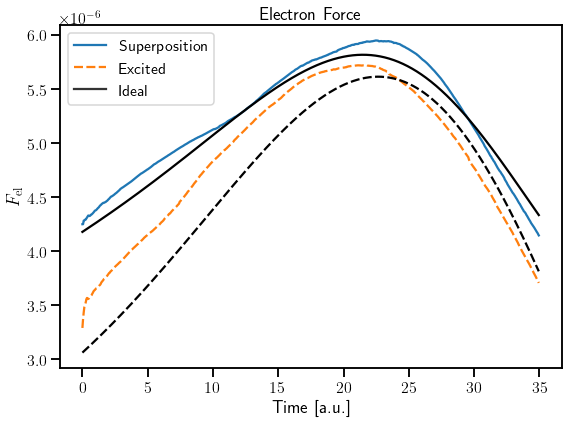

In [7]:
fig, ax = plt.subplots(figsize=((8, 6)))

sns.lineplot(
    data=df, x="times", y="QC_forces_el", ci=None, estimator=np.mean, ax=ax, hue='Simulation',style='Simulation'
)

sns.lineplot(data=df, x="times", y="ideal_forces_el",   ci=None,estimator=np.mean, ax=ax,color='black', style='Simulation')
handles, labels = ax.get_legend_handles_labels()
handles=handles[0:3]
labels=labels[0:3]
labels[2]='Ideal'
l = plt.legend([handles[i] for i in [0,1,2]], [labels[i] for i in [0,1,2]])

ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force')
plt.tight_layout()